In [755]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [756]:
fish_df = pd.read_csv("https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/regression/data/Fish.csv")
fish_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Species: species name of fish Length1: vertical length in cm Length2: diagonal length in cm Length3: cross length in cm Height: height in cm Width: diagonal width in cm Weight: weight of fish in Gram g

In [757]:
fish_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [758]:
#überprüfen des Datasets auf Vollständigkeit 
fish_df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [759]:
fish_df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [760]:
for column in fish_df:
    print(f"{column}: {fish_df[column].unique()}")

Species: ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
Weight: [ 242.   290.   340.   363.   430.   450.   500.   390.   475.   600.
  700.   610.   650.   575.   685.   620.   680.   725.   720.   714.
  850.  1000.   920.   955.   925.   975.   950.    40.    69.    78.
   87.   120.     0.   110.   150.   145.   160.   140.   169.   161.
  200.   180.   272.   270.   306.   540.   800.    55.    60.    90.
  170.   273.   300.     5.9   32.    51.5   70.   100.    80.    85.
  115.   125.   130.   135.   225.   188.   197.   218.   260.   265.
  250.   320.   514.   556.   840.   690.   900.   820.  1015.  1100.
  345.   456.   510.   567.   770.  1250.  1600.  1550.  1650.     6.7
    7.5    7.     9.7    9.8    8.7   10.     9.9   12.2   13.4   19.7
   19.9]
Length1: [23.2 24.  23.9 26.3 26.5 26.8 27.6 28.5 28.4 28.7 29.1 29.5 29.4 30.4
 30.9 31.  31.3 31.4 31.5 31.8 31.9 32.  32.7 32.8 33.5 35.  36.2 37.4
 38.  12.9 16.5 17.5 18.2 18.6 19.  19.1 19.4 20.4 20.5 21.

In [761]:
# überprüfen der Werte ob einer davon =0 ist
print("Anzahl der 0-Werte im Gewicht:", (fish_df['Weight'] == 0).sum())
print("Anzahl der 0-Werte in vertikale Länge:", (fish_df['Length1'] == 0).sum())
print("Anzahl der 0-Werte in diagonale Länge:", (fish_df['Length2'] == 0).sum())
print("Anzahl der 0-Werte in Querlänge:", (fish_df['Length3'] == 0).sum())
print("Anzahl der 0-Werte in Höhe:", (fish_df['Height'] == 0).sum())
print("Anzahl der 0-Werte in Breite:", (fish_df['Width'] == 0).sum())

Anzahl der 0-Werte im Gewicht: 1
Anzahl der 0-Werte in vertikale Länge: 0
Anzahl der 0-Werte in diagonale Länge: 0
Anzahl der 0-Werte in Querlänge: 0
Anzahl der 0-Werte in Höhe: 0
Anzahl der 0-Werte in Breite: 0


In [762]:
fish_df.shape

(159, 7)

In [763]:
# entfernen von 0-Werten im Gewicht
fish_df = fish_df[fish_df['Weight'] != 0]

In [764]:
fish_df.shape

(158, 7)

In [765]:
fish_df_1 = fish_df[['Weight','Length1','Length2','Length3','Height','Width']]
fish_df_1

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [766]:
min_weight = fish_df['Weight'].min()
max_weight = fish_df['Weight'].max()
print("Kleinstes Gewicht:", min_weight)
print("Größtes Gewicht:", max_weight)

Kleinstes Gewicht: 5.9
Größtes Gewicht: 1650.0


# Task1

1. Randomly split dataset with 70/30 training and test dataset

In [767]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sns

In [768]:
#output vector
  
labels = np.array (fish_df_1.filter(items=['Weight']))
  
#input vector

features = np.array(fish_df_1.drop(['Weight'],1))

#skalieren und vorbereiten der features werte

features = preprocessing.scale(features)

#spliten
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3)

In [771]:
# Überprüfen
print("Größe dataset:", fish_df_1.shape)
print("Größe - training set:", features_train.shape)
print("Größe - training set:", labels_train.shape)
print("Größe - testing set:", features_test.shape)
print("Größe - testing set:", labels_test.shape)

Größe dataset: (158, 6)
Größe - training set: (110, 5)
Größe - training set: (110, 1)
Größe - testing set: (48, 5)
Größe - testing set: (48, 1)


2. Use linear regression, random forest model

# Linear regression

In [772]:
#linear regression model erstellen
linear_classifier = LinearRegression()
linear_classifier.fit (features_train, labels_train)

LinearRegression()

In [773]:
#Vorhersage der Gewichte für die Testdaten
linear_pred = linear_classifier.predict(features_test)

In [775]:
#das Rsquare unseres Modells
score = linear_classifier.score(features_test,labels_test)
score

0.8249937639538896

R-Quadrat ist ein statistisches Maß dafür, wie nahe die Daten an der angepassten Regressionslinie liegen. Das R-Quadrat unseres linearen Modells beträgt 0.8249937639538896, was bedeutet, dass der Prozentsatz der erklärten Varianz etwa 82 % beträgt

<AxesSubplot:>

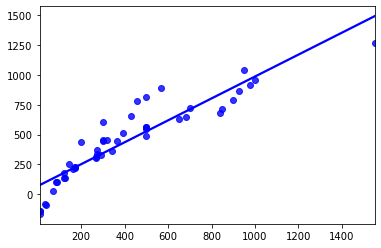

In [776]:
sns.regplot(x=labels_test,y=linear_pred, ci =None, color ="b")

In [777]:
# Berechnung Linear Regression Mean Squared Error
linear_mse = mean_squared_error(labels_test, linear_pred)
print("Linear Regression Mean Squared Error:", linear_mse)

Linear Regression Mean Squared Error: 19135.709684496458


In [778]:
rmse = np.sqrt(linear_mse)
rmse

138.33188238615296

Der Mean Squared Error (MSE) ist eine Metrik zur Bewertung der Genauigkeit eines Regressionsmodells. Er misst den durchschnittlichen quadratischen Unterschied zwischen den vorhergesagten Werten und den tatsächlichen Werten. Ein geringer Wert bedutet eine geringere Abweichung.  Insgesamt zeigt ein MSE-Wert von 19135.71, dass das Modell eine durchschnittliche Abweichung von etwa 138 Gramm (Wurzel aus dem MSE-Wert) in seinen Vorhersagen aufweist. Dies ist im Vergleich zur Spanne der Gewichtsdaten von 5.9 bis 1650.0 relativ hoch.

# Random forest Regression 

In [779]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.pipeline import make_pipeline

In [780]:
# Erstellen und Trainieren des random forest models
rf = RandomForestRegressor()

rf.fit(features_train, labels_train.ravel())

RandomForestRegressor()

In [781]:
# Vorhersage der Gewichte für die Testdaten
rf_pred = rf.predict(features_test)


In [782]:
# berecnen des R2Squared
rf_score= rf.score(features_test,labels_test)
rf_score

0.9707175584760963

In [783]:
# Berechnen Random Forest Mean Squared Error
rf_mse = mean_squared_error(labels_test, rf_pred)
print("Random Forest Mean Squared Error:", rf_mse)

Random Forest Mean Squared Error: 3201.8304748124997


In [784]:
rf_mse = np.sqrt(rf_mse)
rf_mse

56.58471944626481

Der Random Forest-Algorithmus hat einen Mean Squared Error (MSE) von 3525.89 und einen R2-Wert von 0.9735. Das bedeutet, dass die durchschnittliche quadratische Abweichung der Vorhersagen des Random Forest-Modells von den tatsächlichen Werten bei etwa 3525.89 bzw. 56 g liegt. Ein hoher R2-Wert von 0.9707 deutet darauf hin, dass der Random Forest-Algorithmus etwa 97% der Varianz in den abhängigen Variablen erklären kann.

# Visualized the predictions and compare the method

In [785]:
import matplotlib.pyplot as plt

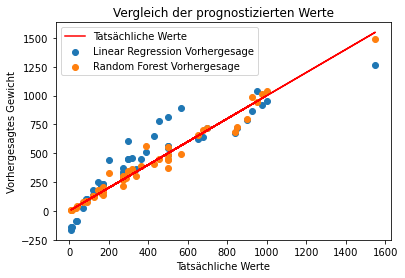

In [786]:
plt.scatter(labels_test, linear_pred, label="Linear Regression Vorhergesage")
plt.scatter(labels_test, rf_pred, label="Random Forest Vorhergesage")
plt.plot(labels_test,labels_test, color='red', label="Tatsächliche Werte")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagtes Gewicht")
plt.title("Vergleich der prognostizierten Werte")
plt.legend()
plt.show()

Das Random forest Regression Modell zeigt "bessere" Ergebnisse als Linear regression Modell. In Bezug auf die Leistung der beiden Modelle zeigt der Random Forest-Algorithmus eine geringere durchschnittliche Abweichung (geringerer MSE) und eine höhere Trefferquote (höherer R2-Wert) im Vergleich zur linearen Regression. Aus der Grafik ist ebenfalls ersichtlich , dass die durch Vorhergesagte Wertze Random forest Regression näher an den tatsächlichen Werten liegen.

# Task2:


5. Change the training-test split setting, with the 70/30 principle for each species. That means, in any of the species, there needs to be 70% of the sample in the training set, and 30% of the sample in the test set.

In [787]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [788]:
data_counts = fish_df['Species'].value_counts()

print(data_counts)

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


In [789]:
# Eindeutige Arten im Datensatz ermitteln
species = fish_df['Species'].unique()

# Für jede Art die Daten aufteilen und dem entsprechenden Trainings- oder Testdatensatz hinzufügen
for specie in species:
    # Daten für die aktuelle Art auswählen
    specie_data = fish_df[fish_df['Species'] == specie]
    
    # Aufteilen der Daten in Trainings- und Testdaten nach dem 70/30-Prinzip
    train_specie, test_specie = train_test_split(specie_data, test_size=0.3, random_state=42)
    
    # Hinzufügen der aufgeteilten Daten zur Gesamtmenge von Trainings- und Testdaten
    train_data = pd.concat([train_data, train_specie])
    test_data = pd.concat([test_data, test_specie])

#Auswählen der Merkmale und der Zielvariable
x = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
y = 'Weight'

X_train = train_data[x]
y_train = train_data[y]
X_test = test_data[x]
y_test = test_data[y]

# Lineare Regression

In [795]:
#Trainieren der linearen Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [796]:
#Vorhersagen auf dem Testdatensatz machen
linear_predictions = linear_model.predict(X_test)

In [797]:
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
linear_r2 = r2_score(y_test, linear_predictions)

print("Lineare Regression - RMSE:", linear_rmse)
print("Lineare Regression - R-squared:", linear_r2)

Lineare Regression - RMSE: 143.17882173523202
Lineare Regression - R-squared: 0.8489865552170937


In [798]:
rmse = np.sqrt(linear_rmse)
rmse

11.96573531945413

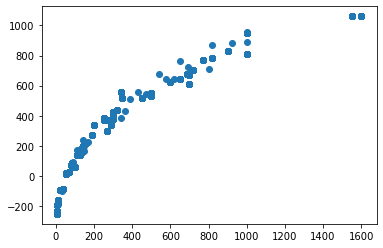

In [793]:
plt.scatter(y_test, linear_predictions, label="Lineare Regression Predictions")

Das R-Quadrat unseres linearen Modells nach dem Aufarbeitung der Daten beträgt 0.8489865552170937, was bedeutet, dass der Prozentsatz der erklärten Varianz etwa 85 % beträgt. Der RMSEWert beträgt 143.17882173523202( bzw. 11.9657g).  Insgesamt hat sich die Leistungsfähigkeit hat sich im Vergleich zum Task1 deutlich verbessert.

# Random forest Regression

In [799]:
#Trainieren des Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [800]:
##Vorhersagen auf dem Testdatensatz machen
rf_predictions = rf_model.predict(X_test)

In [801]:
#Berechnen RMSE und R-squared
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest - RMSE:", rf_rmse)
print("Random Forest - R-squared:", rf_r2)

Random Forest - RMSE: 72.1144409741062
Random Forest - R-squared: 0.9616908488882864


In [803]:
rf_rmse = np.sqrt(rf_rmse)
rf_rmse

8.492022195808616

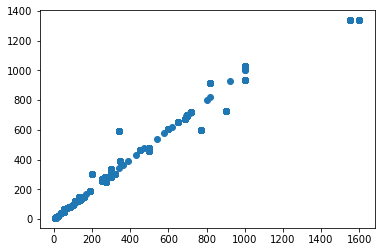

In [804]:
plt.scatter(y_test, rf_predictions, label="Random Forest Predictions")

Der R-squared-Wert des Random forest Models nach dem Aufarbeitung der Daten beträgt 0.9616908488882864, was bedeutet, dass der Prozentsatz der erklärten Varianz etwa 96 % beträgt. Der RMSEWert beträgt 0.9616908488882864( bzw. 8.49g).  Insgesamt hat sich die Leistungsfähigkeit hat sich im Vergleich zum Task1 etwas verbessert. Allerdings kann der zu hohe R-squared-Wert und sehr niedriger RMSE auf die Überanpassung hindeuten.

# Visualized the predictions and compare the method


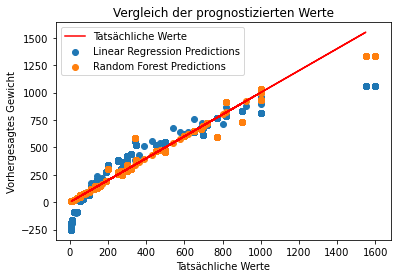

In [805]:
plt.scatter(y_test, linear_predictions, label="Linear Regression Predictions")
plt.scatter(y_test, rf_predictions, label="Random Forest Predictions")
plt.plot(labels_test,labels_test, color='red', label="Tatsächliche Werte")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagtes Gewicht")
plt.title("Vergleich der prognostizierten Werte")
plt.legend()
plt.show()

Der Random Forest hat einen niedrigeren RMSE (Root Mean Squared Error) von 73.04 im Vergleich zum RMSE der linearen Regression von 142.91. Ein niedrigerer RMSE deutet darauf hin, dass die Vorhersagen des Modells näher an den tatsächlichen Werten liegen.

Der R-squared-Wert, der das Bestimmtheitsmaß des Modells darstellt, ist ebenfalls höher für den Random Forest (0.961) im Vergleich zur linearen Regression (0.849). Ein höherer R-squared-Wert bedeutet, dass das Modell eine bessere Anpassung an die Daten hat und mehr Variation in den abhängigen Variablen erklären kann.

Insgesamt liefert der Random Forest-Algorithmus genauere Vorhersagen und eine bessere Anpassung an die Daten als die lineare Regression in diesem Szenario.

# Compare the results in task1 and task2 

Task 1:

Lineare Regression - Mean Squared Error: 19135.71, R-squared: 0.8249
Random Forest - Mean Squared Error: 3201.83, R-squared: 0.9707


Task 2:

Lineare Regression - RMSE: 142.91, R-squared: 0.849
Random Forest - RMSE: 73.04, R-squared: 0.961

Die Ergebnisse zeigen, dass durch die Anpassung der Training-Test-Aufteilung nach dem 70/30-Prinzip für jede Art im Task 2 eine deutliche Verbesserung der Vorhersagegenauigkeit erreicht wurde.